<a href="https://colab.research.google.com/github/gre1wy/mmrokz/blob/main/homework/part2/hm7_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prac 07.2

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [45]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 9]

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

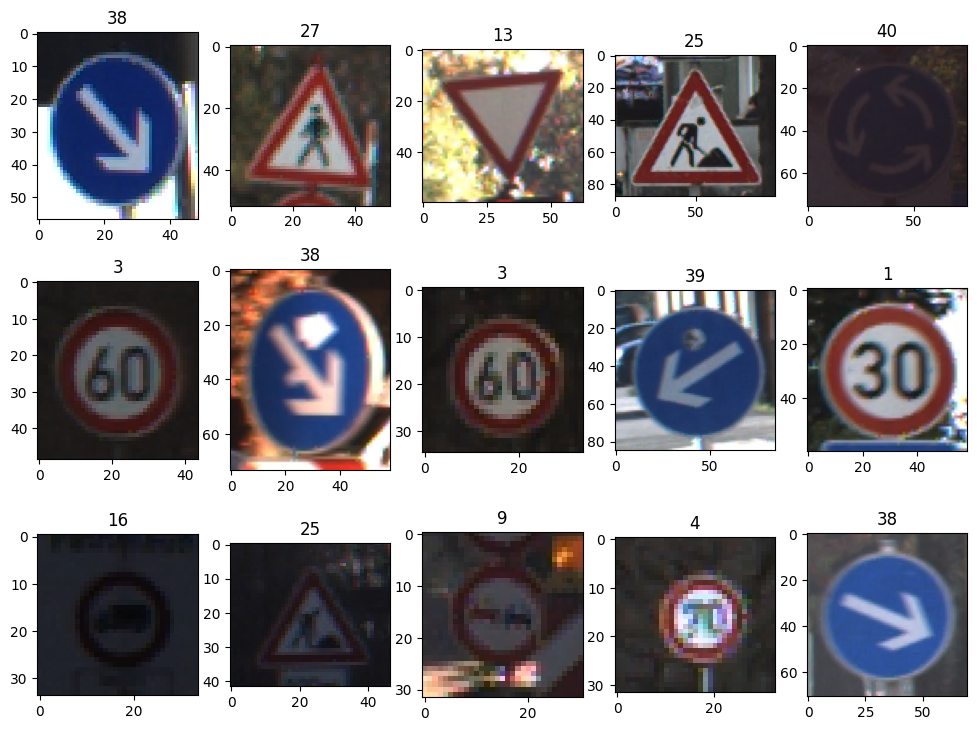

In [12]:
# Load the training labels
root = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [9]:
# Extract class identifiers
# Hint: Check the csv
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

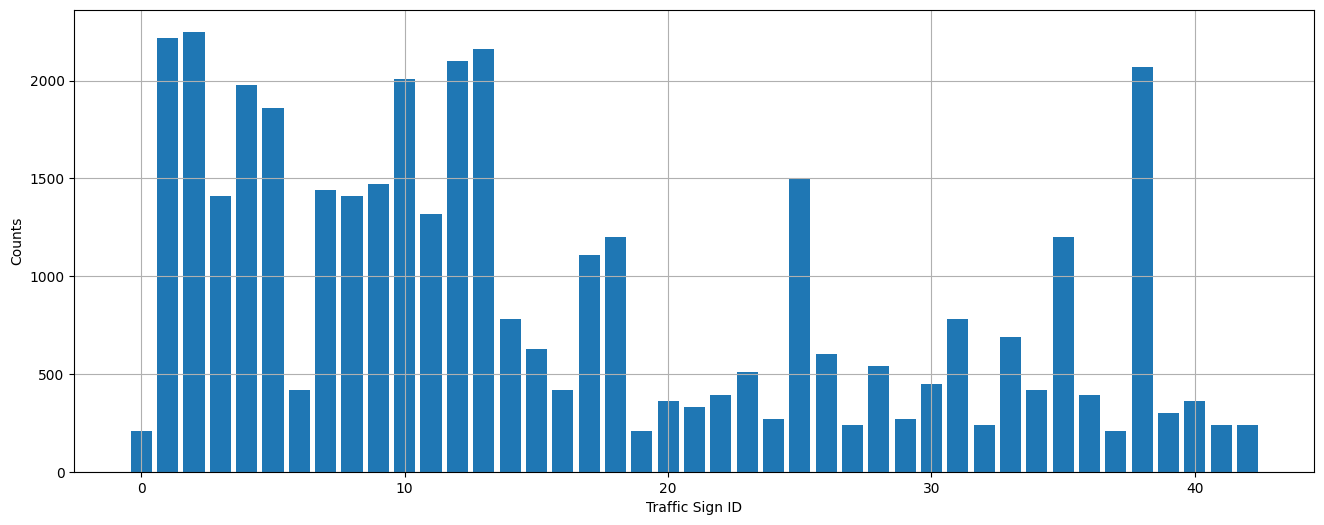

In [15]:
from collections import Counter
hist = Counter(ids)

plt.figure(figsize=(16, 6))
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [16]:
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [41]:
summary = (
    data.groupby("ClassId")[["Width", "Height", "Area"]]
    .agg([
        ("min", "min"),
        ("max", "max"),
        ("mean", "mean"),
        ("median", "median"),
        ("std", "std"),
    ])
)


In [42]:
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.reset_index()


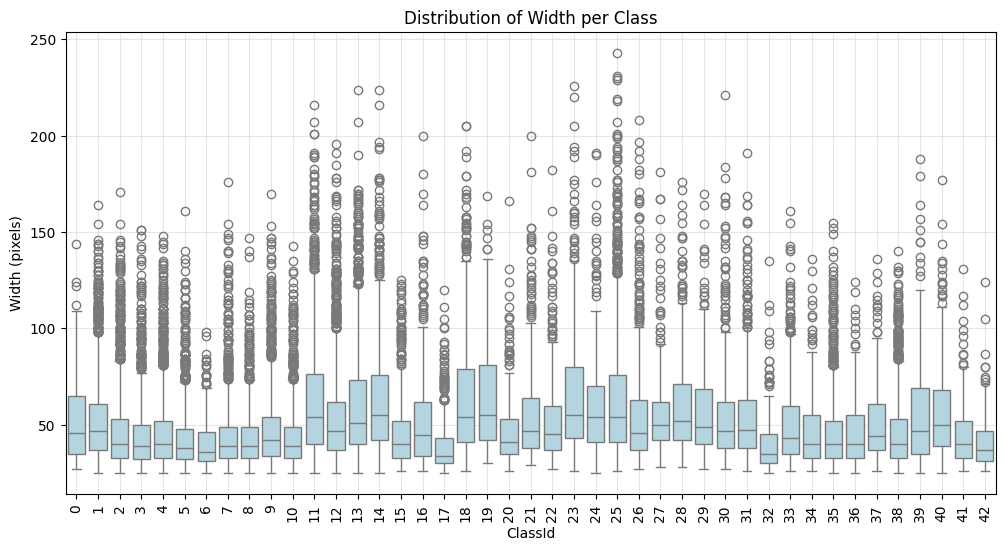

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="ClassId", y="Width", color="lightblue")
plt.title("Distribution of Width per Class")
plt.xlabel("ClassId")
plt.ylabel("Width (pixels)")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

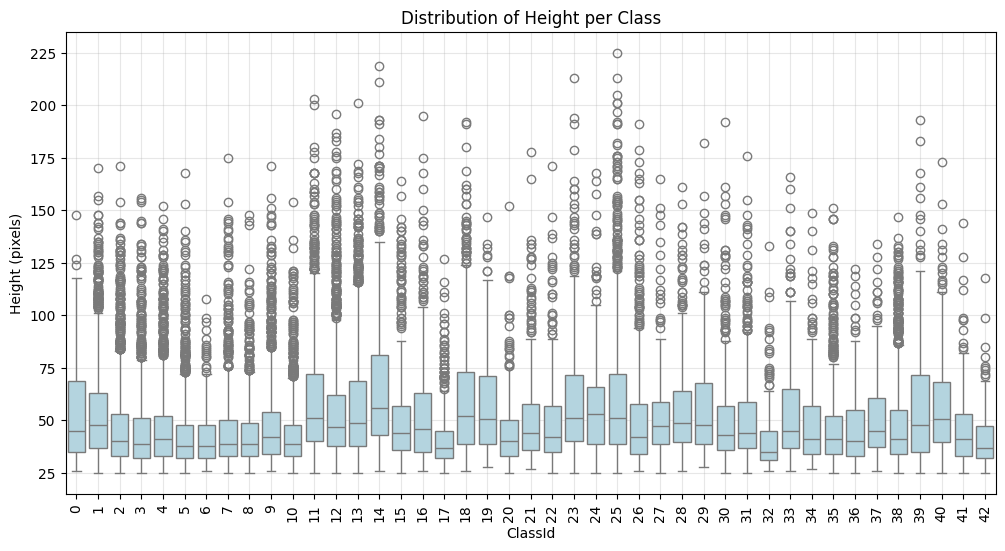

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x="ClassId", y="Height", color="lightblue")
plt.title("Distribution of Height per Class")
plt.xlabel("ClassId")
plt.ylabel("Height (pixels)")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

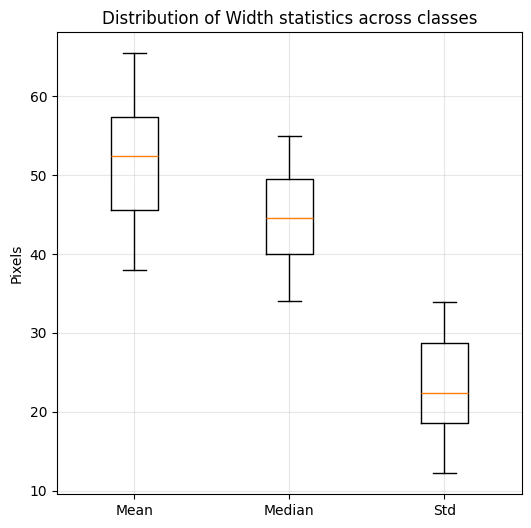

In [51]:
plt.figure(figsize=(6,6))
plt.boxplot(
    [summary["Width_mean"], summary["Width_median"], summary["Width_std"]],
    tick_labels=["Mean", "Median", "Std"]
)
plt.title("Distribution of Width statistics across classes")
plt.ylabel("Pixels")
plt.grid(alpha=0.3)
plt.show()

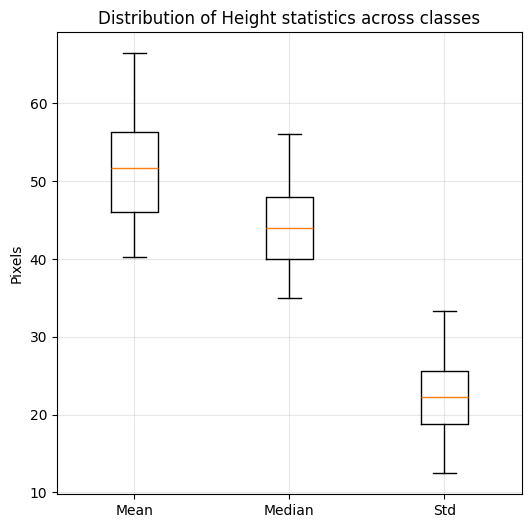

In [52]:
plt.figure(figsize=(6,6))
plt.boxplot(
    [summary["Height_mean"], summary["Height_median"], summary["Height_std"]],
    tick_labels=["Mean", "Median", "Std"]
)
plt.title("Distribution of Height statistics across classes")
plt.ylabel("Pixels")
plt.grid(alpha=0.3)
plt.show()

In [55]:
root = "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train"

brightness_data = []

for class_id in range(43):
    class_path = os.path.join(root, str(class_id))
    for file in os.listdir(class_path):
        if file.endswith(".png"):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                brightness = img.mean()
                brightness_data.append({
                    "ClassId": class_id,
                    "Brightness": brightness
                })

data = pd.DataFrame(brightness_data)

In [56]:
data

,ClassId,Brightness
0,0,123.104354
1,0,129.358333
2,0,174.284732
3,0,105.215820
4,0,68.621732
...,...,...
39204,42,20.646645
39205,42,83.364865
39206,42,47.826437
39207,42,24.254931


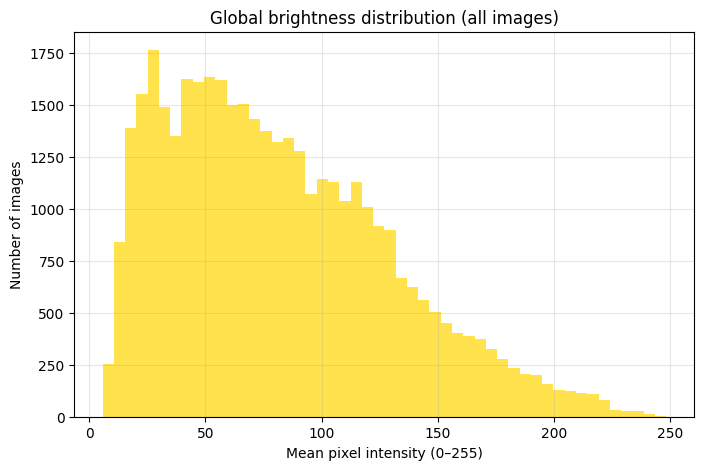

In [57]:
plt.figure(figsize=(8,5))
plt.hist(data["Brightness"], bins=50, color="gold", alpha=0.7)
plt.title("Global brightness distribution (all images)")
plt.xlabel("Mean pixel intensity (0–255)")
plt.ylabel("Number of images")
plt.grid(alpha=0.3)
plt.show()


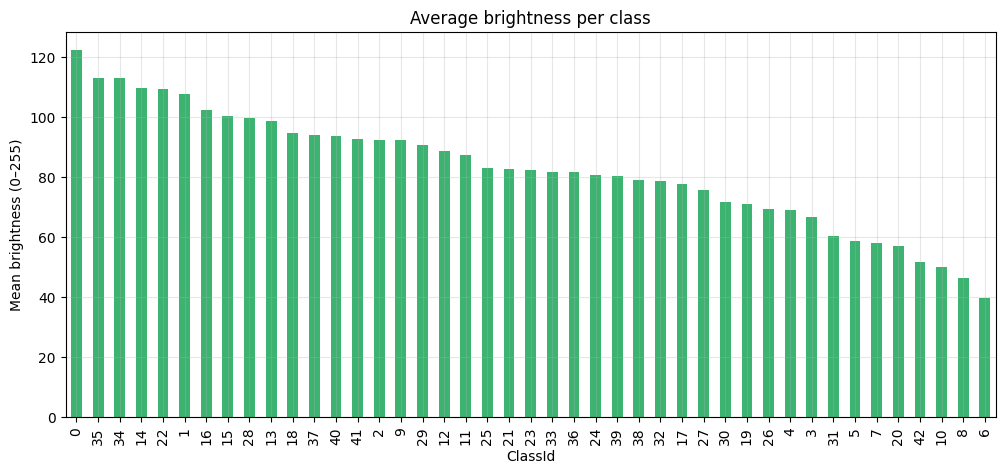

In [61]:
brightness_by_class = (
    data.groupby("ClassId")["Brightness"]
    .agg(["mean"])
    .sort_values("mean", ascending=False)
)

plt.figure(figsize=(12,5))
brightness_by_class["mean"].plot(kind="bar", color="mediumseagreen")
plt.title("Average brightness per class")
plt.ylabel("Mean brightness (0–255)")
plt.xlabel("ClassId")
plt.grid(alpha=0.3)
plt.show()